### LIBRARIES

In [1]:
from main import ClusterHandler, load_sns_theme
import pandas as pd
from pyspark.ml.feature import PCA
from pyspark.ml.regression import LinearRegression

### DATASET

In [7]:
data = pd.read_csv("data/molec_structure.csv")
data = data.drop(columns=["material"])

### SPARK SESSION

In [3]:
handler = ClusterHandler()
handler.run_session()
#handler.run_session(type='remote', ip='192.168.137.1', port='7077')


Session 'Session' created on masternode local[*]
Spark UI (jobs tab) is available at http://SERENITY.mshome.net:4042



<SparkContext master=local[*] appName=Session>

### RIDGE REGRESSION

In [8]:
handler.generate_dataframe(data=data)
handler.dataframe.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+-------------+
|  H| He| Li| Be|  B|  C|  N|  O|  F| Ne| Na| Mg| Al| Si|  P|  S| Cl| Ar|  K| Ca| Sc| Ti|  V| Cr| Mn| Fe| Co| Ni|  Cu| Zn| Ga| Ge| As| Se| Br| Kr| Rb|  Sr|  Y| Zr| Nb| Mo| Tc| Ru| Rh| Pd|  Ag| Cd| In| Sn| Sb| Te|  I| Xe| Cs|  Ba|  La| Ce| Pr| Nd| Pm| Sm| Eu| Gd| Tb| Dy| Ho| Er| Tm| Yb| Lu| Hf| Ta|  W| Re| Os| Ir| Pt| Au| Hg| Tl| Pb| Bi| Po| At| Rn|critical_temp|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+

In [9]:
input_columns = [feature for feature in data.columns if feature != "critical_temp"]
handler.assemble_features(input_columns=input_columns)

In [10]:
ridge = LinearRegression(featuresCol="features", labelCol="critical_temp", elasticNetParam=0)

fit_results = handler.fit_lr(model=ridge, y_column="critical_temp", folds=5, reg_params=[0.001, 0.01, 0.1, 0.5, 1.0])
fit_results

{0.001: 0.5257642697233106,
 0.01: 0.5257137039247288,
 0.1: 0.5252074774498501,
 0.5: 0.5229766808519332,
 1.0: 0.5203291956120095}

In [11]:
print(handler.extract_lr_coefficients())

{'Ba': 20.59927973933385, 'Hg': 14.163897321233048, 'Sr': 11.762805128837291, 'Ca': 8.344822020593659, 'Ce': -7.091193748694846, 'Tl': 6.926172666683187, 'Dy': 6.767224750707812, 'Tb': 5.696275015081364, 'Rb': 5.6891618624053235, 'Yb': 5.656204683099397, 'F': 5.34341201471838, 'Er': 5.339249629537549, 'Ho': 5.310078660701096, 'Cs': 5.198380887004288, 'Mg': 5.018006689283054, 'Lu': 4.921016215769511, 'Y': 4.376733814994619, 'Sm': 4.279188482291635, 'As': -3.693051429622925, 'Si': -3.5591777260424564, 'W': -3.336987930936212, 'Ag': -3.242082247047586, 'Bi': 3.128034135504204, 'Tc': -2.996417980669389, 'Sc': 2.9315491130101035, 'Gd': 2.9107207106624298, 'Br': -2.791299839037779, 'I': -2.7640014967384254, 'Ge': -2.639678954775786, 'Tm': 2.634381838864804, 'Os': -2.5273877379739993, 'Na': 2.498824800929316, 'Pt': -2.0093643296609986, 'S': -1.8504156146748971, 'Nd': 1.8055655842958733, 'K': 1.6838235027205875, 'Hf': -1.648226829398743, 'Eu': -1.389778084851404, 'Cl': -1.3032783037538478, 'Ir

### PCA - PRINCIPAL COMPONENT ANALYSIS

In [12]:
handler.generate_dataframe(data=data, y="critical_temp")
handler.dataframe.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|  H| He| Li| Be|  B|  C|  N|  O|  F| Ne| Na| Mg| Al| Si|  P|  S| Cl| Ar|  K| Ca| Sc| Ti|  V| Cr| Mn| Fe| Co| Ni|  Cu| Zn| Ga| Ge| As| Se| Br| Kr| Rb|  Sr|  Y| Zr| Nb| Mo| Tc| Ru| Rh| Pd|  Ag| Cd| In| Sn| Sb| Te|  I| Xe| Cs|  Ba|  La| Ce| Pr| Nd| Pm| Sm| Eu| Gd| Tb| Dy| Ho| Er| Tm| Yb| Lu| Hf| Ta|  W| Re| Os| Ir| Pt| Au| Hg| Tl| Pb| Bi| Po| At| Rn|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

In [13]:
handler.assemble_features()
handler.scale_features()

In [14]:
dimensions = 5
model = PCA(k=dimensions, inputCol="scaledFeatures", outputCol="pcaFeatures")
handler.fit_pca(model)

explained_variance = handler.pca_model.explainedVariance
explained_variance

DenseVector([0.0357, 0.0331, 0.0261, 0.0248, 0.0239])

In [15]:
for dim in range(0, dimensions): 
    print(f"Coefficients for dimension {dim}: {handler.extract_pca_coefficients(dimension=dim)}")

Coefficients for dimension 0: {'O': -0.48382218059493876, 'Cu': -0.44296753389015836, 'Ba': -0.3378500104876356, 'Sr': -0.24645917835405495, 'Y': -0.2219746212707179, 'Fe': 0.207596857817679, 'As': 0.18489715432662648, 'Pt': 0.1508292670874972, 'Bi': -0.14900887760492745, 'C': 0.12450193361921233, 'Ca': -0.11816355116351415, 'B': 0.10020672754938575, 'Nb': 0.09788388638252182, 'K': 0.09546510142673637, 'Tl': -0.09252549987010568, 'Ir': 0.09245336938935801, 'Na': 0.09175730598881697, 'Ga': 0.08593335550756954, 'Hg': -0.08336100694039958, 'Mg': 0.08301919700641149, 'Rb': 0.08219335595446421, 'Gd': -0.080281039360455, 'Se': 0.07971105704152726, 'V': 0.07640161755215602, 'S': 0.06955143478441582, 'Mo': 0.06935922694391793, 'Sb': 0.06846957543333433, 'Zr': 0.06838480495416847, 'N': 0.06663191615144484, 'Ta': 0.06612922247092629, 'Ni': 0.06546635768799185, 'In': 0.06513876146900117, 'H': 0.06510528041305116, 'Pd': 0.06392044375483487, 'Rh': 0.06162053892471376, 'Li': 0.06113562325199717, 'Lu

In [16]:
load_sns_theme(r"utilities\themes\fire_theme.json")

{'figure.facecolor': '#202021',
 'axes.facecolor': '#262626',
 'axes.edgecolor': '#cfcfd1',
 'axes.grid': True,
 'grid.color': '#555555',
 'grid.linewidth': 0.5,
 'xtick.color': '#ffffff',
 'ytick.color': '#ffffff',
 'axes.labelcolor': '#ffffff'}

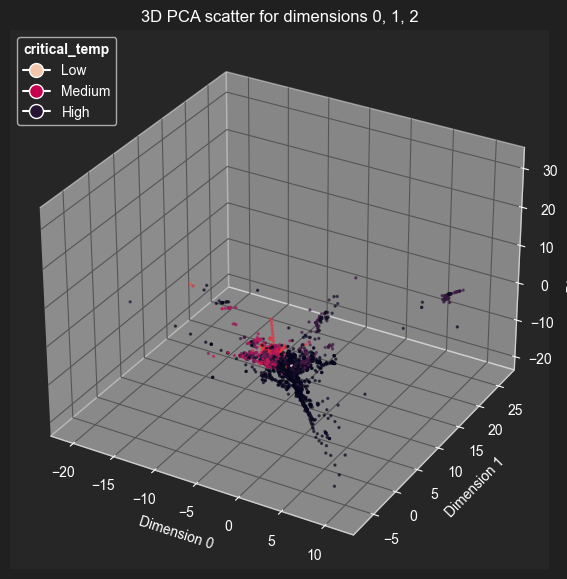

In [17]:
handler.plot_3d_pca(dimensions=[0,1,2], color_by="critical_temp")

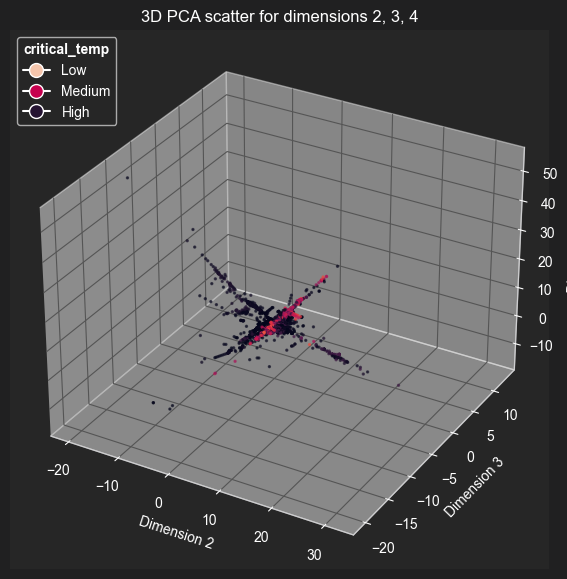

In [18]:
handler.plot_3d_pca(dimensions=[2,3,4], color_by="critical_temp")